In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../../project_data/washington_timestamp_data.csv") 

In [3]:
df.shape

(1370980, 33)

In [4]:
df.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,False,False,False,False,False,False
1,5,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,False,False,False,False,False,True,True,True,True,False
2,6,A-2716606,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,...,False,False,False,True,False,True,True,True,True,True
3,7,A-2716607,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,...,False,False,False,False,False,True,True,True,True,False
4,8,A-2716608,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,...,False,False,False,False,False,True,True,True,True,False


In [5]:
df = df.drop('Unnamed: 0',axis = 1)

In [6]:
#converted 'Start_Time' to datetime64
df['Start_Time']= pd.to_datetime(df['Start_Time'])

#converted 'End_Time' to datetime64
df['End_Time']= pd.to_datetime(df['End_Time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370980 entries, 0 to 1370979
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1370980 non-null  object        
 1   Severity               1370980 non-null  int64         
 2   Start_Time             1370980 non-null  datetime64[ns]
 3   End_Time               1370980 non-null  datetime64[ns]
 4   Start_Lat              1370980 non-null  float64       
 5   Start_Lng              1370980 non-null  float64       
 6   End_Lat                1370980 non-null  float64       
 7   End_Lng                1370980 non-null  float64       
 8   Distance(mi)           1370980 non-null  float64       
 9   State                  1370980 non-null  object        
 10  Humidity(%)            1370980 non-null  float64       
 11  Pressure(in)           1370980 non-null  float64       
 12  Visibility(mi)         13709

In [9]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'OK', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'NC',
       'SC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [10]:
#subsetting the dataframe with only data with state = washington(WA)
df_wa = df.loc[df['State'] == 'WA']
df_wa.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),State,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
91570,A-2827580,2,2016-11-30 12:49:30,2016-11-30 18:49:30,47.016805,-122.905991,47.014850,-122.906040,0.135,WA,...,False,False,False,False,False,True,True,True,True,False
91578,A-2827590,2,2016-11-30 14:00:35,2016-11-30 20:00:35,47.332115,-123.906520,47.332071,-123.906524,0.003,WA,...,False,False,False,False,False,True,True,True,True,False
91595,A-2827612,3,2016-11-30 14:52:55,2016-11-30 20:52:55,47.884150,-122.231190,47.877440,-122.239700,0.609,WA,...,False,False,False,False,False,True,True,True,True,False
91617,A-2827637,2,2016-11-30 15:25:58,2016-11-30 21:25:58,48.188130,-122.195055,48.188227,-122.192777,0.105,WA,...,False,True,False,False,False,True,True,True,True,True
91661,A-2827688,3,2016-11-30 16:48:47,2016-11-30 22:48:47,47.599430,-122.180330,47.605310,-122.185770,0.479,WA,...,False,False,False,False,False,False,True,True,True,False


In [12]:
df_wa.shape

(19974, 32)

In [13]:
df_wa_sign = df_wa[df_wa["Sign"]==True]
df_wa_sign.shape

(5299, 32)

In [14]:
#subsetting 25 rows from the dataframe that will be used to collect images from google maps streetview
df_google_image = df_wa_sign.iloc[:25, :]
df_google_image.head(26)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),State,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
91617,A-2827637,2,2016-11-30 15:25:58,2016-11-30 21:25:58,48.188130,-122.195055,48.188227,-122.192777,0.105,WA,...,False,True,False,False,False,True,True,True,True,True
91675,A-2827704,3,2016-11-30 17:10:47,2016-11-30 23:10:47,47.573921,-122.339510,47.567360,-122.339460,0.453,WA,...,False,False,False,False,False,False,False,True,True,True
91720,A-2827768,2,2016-11-30 18:53:04,2016-12-01 00:53:04,47.637790,-122.193540,47.641740,-122.199308,0.383,WA,...,False,False,False,False,False,False,False,False,False,True
91742,A-2827812,2,2016-12-01 06:18:26,2016-12-01 12:18:26,47.472142,-122.269086,47.471470,-122.268910,0.047,WA,...,False,False,False,False,False,False,False,False,True,True
91780,A-2827885,2,2016-12-01 10:24:26,2016-12-01 16:24:26,47.269190,-122.260660,47.272461,-122.259294,0.235,WA,...,False,False,False,False,False,True,True,True,True,True
91902,A-2828052,3,2016-12-01 17:55:27,2016-12-01 23:55:27,48.079390,-122.184970,48.071690,-122.184940,0.532,WA,...,False,False,False,False,False,False,False,False,True,True
92017,A-2828231,2,2016-12-02 09:44:46,2016-12-02 15:44:46,47.408204,-122.038119,47.408807,-122.038334,0.043,WA,...,True,False,False,False,False,True,True,True,True,True
92097,A-2828314,2,2016-12-02 15:11:06,2016-12-02 21:11:06,47.664940,-122.316323,47.664920,-122.314742,0.074,WA,...,True,False,False,True,False,True,True,True,True,True
92098,A-2828315,2,2016-12-02 15:11:06,2016-12-02 21:11:06,47.664920,-122.314742,47.664940,-122.316323,0.074,WA,...,False,False,False,False,False,True,True,True,True,True
92245,A-2828479,3,2016-12-02 19:59:46,2016-12-03 01:59:46,47.487850,-122.278970,47.485670,-122.275720,0.214,WA,...,False,False,False,False,False,False,False,False,False,True


In [15]:
df_google_image.to_csv('../data/Washington_state_data_for_google_images.csv')

In [16]:
percent_df = df['Severity'].value_counts()/df.shape[0]*100
percent_df

2    80.659893
3    10.303287
4     7.025558
1     2.011262
Name: Severity, dtype: float64

In [15]:
percent_df_wa = df_wa['Severity'].value_counts()/df_wa.shape[0]*100
percent_df_wa

2    66.186042
3    18.609192
4    12.731551
1     2.473215
Name: Severity, dtype: float64

In [16]:
percent_df_wa_sign = df_wa_sign['Severity'].value_counts()/df_wa_sign.shape[0]*100
percent_df_wa_sign

2    59.916965
3    18.852614
4    16.361578
1     4.868843
Name: Severity, dtype: float64

In [17]:
compare_per = pd.DataFrame({'all_state_data':percent_df,'wa_state_data':percent_df_wa,'wa_state_data_sign_present':percent_df_wa_sign})

In [18]:
compare_per

,all_state_data,wa_state_data,wa_state_data_sign_present
2,80.659893,66.186042,59.916965
3,10.303287,18.609192,18.852614
4,7.025558,12.731551,16.361578
1,2.011262,2.473215,4.868843


In [19]:
df_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19974 entries, 91570 to 1370904
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     19974 non-null  object        
 1   Severity               19974 non-null  int64         
 2   Start_Time             19974 non-null  datetime64[ns]
 3   End_Time               19974 non-null  datetime64[ns]
 4   Start_Lat              19974 non-null  float64       
 5   Start_Lng              19974 non-null  float64       
 6   End_Lat                19974 non-null  float64       
 7   End_Lng                19974 non-null  float64       
 8   Distance(mi)           19974 non-null  float64       
 9   State                  19974 non-null  object        
 10  Humidity(%)            19974 non-null  float64       
 11  Pressure(in)           19974 non-null  float64       
 12  Visibility(mi)         19974 non-null  float64       


In [20]:
data_geo = df_wa.iloc[:,4:8]
data_weather = df_wa.iloc[:,10:14]
print(data_geo.shape)
print(data_weather.shape)

(19974, 4)
(19974, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9f7f8aa040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9f7f8aa700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9f7f89dca0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9f7f8aadc0>,
 'fliers': [],
 'means': []}

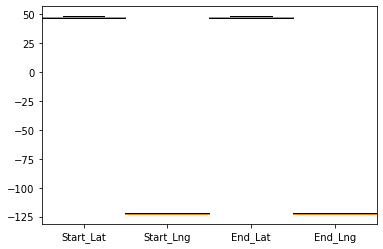

In [35]:
plt.boxplot(data_geo, labels=data_geo.columns, showfliers=False, widths=(1,1,1,1))

array([<AxesSubplot:title={'center':'Start_Lat'}, xlabel='Severity'>,
       <AxesSubplot:title={'center':'End_Lat'}, xlabel='Severity'>],
      dtype=object)

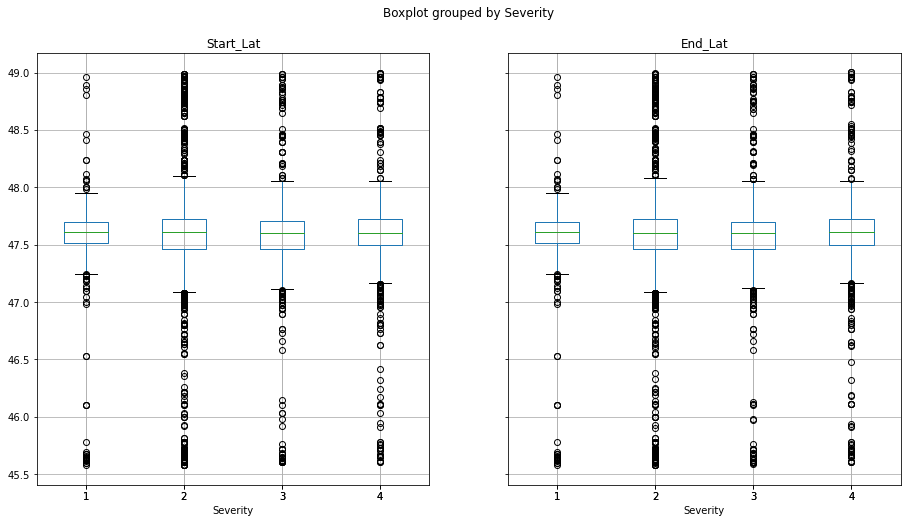

In [72]:
df_wa_sign.boxplot(column= ['Start_Lat','End_Lat'],by='Severity', figsize=(15,8))

array([<AxesSubplot:title={'center':'Start_Lng'}, xlabel='Severity'>,
       <AxesSubplot:title={'center':'End_Lng'}, xlabel='Severity'>],
      dtype=object)

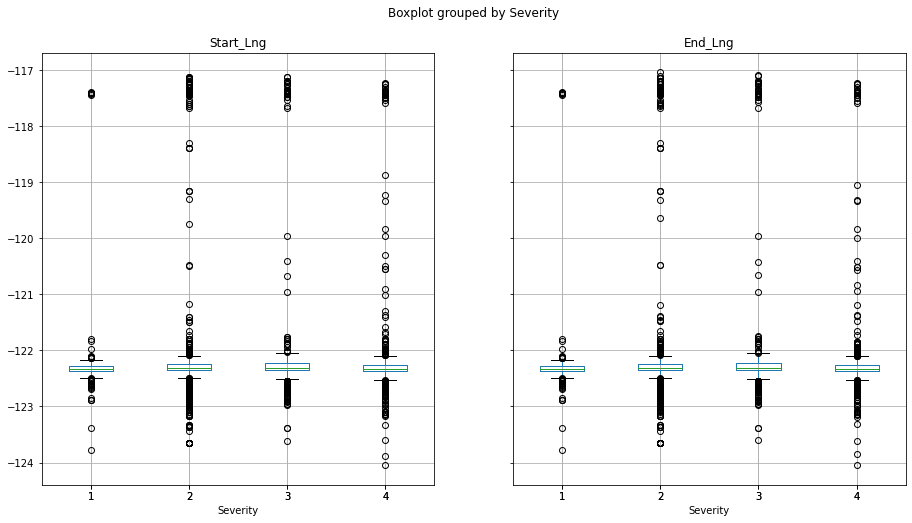

In [61]:
df_wa_sign.boxplot(column= ['Start_Lng','End_Lng'],by='Severity', figsize=(15,8))

In [31]:
corr_geo = data_geo.corr()
corr_geo

,Start_Lat,Start_Lng,End_Lat,End_Lng
Start_Lat,1.000000,0.103327,0.999646,0.103234
Start_Lng,0.103327,1.000000,0.103948,0.999735
End_Lat,0.999646,0.103948,1.000000,0.103837
End_Lng,0.103234,0.999735,0.103837,1.000000


In [30]:
corr_weather = data_weather.corr()
corr_weather

,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Humidity(%),1.000000,-0.042502,-0.336526,-0.104770
Pressure(in),-0.042502,1.000000,0.065974,-0.094224
Visibility(mi),-0.336526,0.065974,1.000000,0.084664
Wind_Speed(mph),-0.104770,-0.094224,0.084664,1.000000


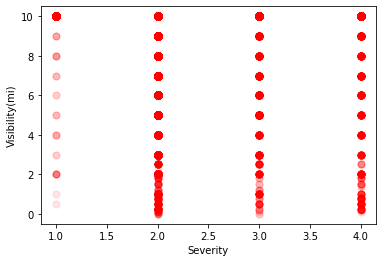

In [74]:
ax=df_wa.plot.scatter(y= "Visibility(mi)", x="Severity", color="red", s=50 , alpha = 0.1)

<AxesSubplot:xlabel='Severity'>

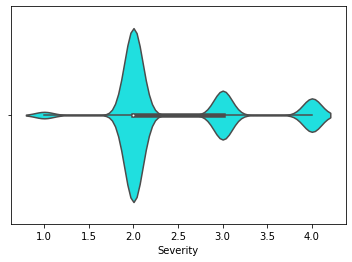

In [48]:
sns.violinplot(x=df_wa["Severity"],color="aqua")

<AxesSubplot:xlabel='Severity'>

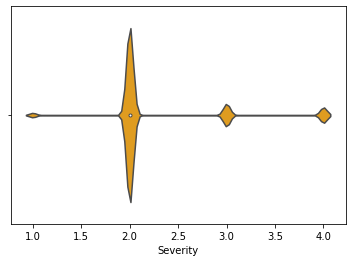

In [51]:
sns.violinplot(x=df["Severity"],color="orange")

<AxesSubplot:ylabel='Density'>

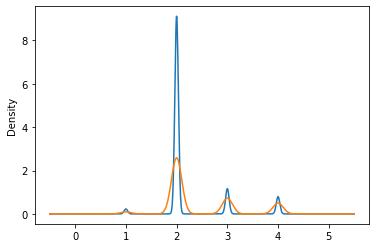

In [52]:
df["Severity"].plot(kind="density")
df_wa["Severity"].plot(kind="density")

In [8]:
df['Severity'].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

In [9]:
percent_df = df['Severity'].value_counts()/df.shape[0]*100
percent_df

2    79.969051
3    10.623034
4     7.549286
1     1.858629
Name: Severity, dtype: float64

In [10]:
## Adding a sign column which combines all sign booleans

In [11]:
df['Sign']=df.iloc[:,30:43].any(axis='columns')

In [12]:
df['Sign'].head()

0    False
1    False
2     True
3     True
4    False
Name: Sign, dtype: bool

In [13]:
df['Sign'].value_counts()

False    1084933
True      431131
Name: Sign, dtype: int64

In [14]:
percent_sign = df['Sign'].value_counts()/df.shape[0]*100
percent_sign

False    71.56248
True     28.43752
Name: Sign, dtype: float64

## 1. Null Handling

In [15]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [16]:
# drop columns with too many null values
#drop_columns = ['Number','Wind_Chill(F)','Precipitation(in)']

#df = df.drop(drop_columns,axis=1)

#df = df[['Number','Wind_Chill(F)','Precipitation(in)']].drop()

In [17]:
# drop row with null values
df = df.dropna()

In [18]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

## 2. Data type encoding and handling 

In [19]:
# Mapping for Day and Night to 1 = day , 0 = night 
map_replace = {'Night': 0 ,'Day': 1,'night': 0 ,'day':1}
map_replace

{'Night': 0, 'Day': 1, 'night': 0, 'day': 1}

In [20]:
# Convert columns to values 0 or 1
make_bool = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
df.loc[:,make_bool] = df.loc[:,make_bool].replace(map_replace)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
44,A-2716644,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.45112,-85.15048,40.35429,-85.14993,6.690,Closed between IN-26 and IN-67 - Road closed d...,...,False,False,False,False,False,0,1,1,1,False
45,A-2716645,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.35429,-85.14993,40.45112,-85.15048,6.690,Closed between IN-67 and IN-26 - Road closed d...,...,False,False,False,False,False,0,1,1,1,False
49,A-2716649,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.72813,-84.78965,40.74559,-84.78962,1.206,Closed between Willshire and US-33/Rockford Rd...,...,False,False,False,False,False,0,0,0,1,False
52,A-2716652,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.83193,-80.10143,41.84149,-80.11099,0.824,Between Irish Rd and Blystone Rd - Accident.,...,False,False,False,False,False,1,1,1,1,False
69,A-2716669,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.48339,-81.66297,41.47692,-81.66075,0.462,At I-490/Exit 161 - Accident.,...,False,False,False,False,False,1,1,1,1,False


In [21]:
# convert the integers to a bool type
df[make_bool] = df[make_bool].astype('bool',errors='raise')

# convert to category for Severity the columns
df['Severity'] = df['Severity'].astype('category')

In [22]:
## column handling 

In [23]:
# list of continuous columns to keep
#added columns state, start_time and End_time to the dataframe
con_cols = df.iloc[:,21:]
con_col_name = con_cols.columns


# list to keep for washington geo plotting
columns_to_keep_wa = ['ID','Severity','Start_Time', 'End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)','State']
columns_to_keep_wa.extend(con_col_name)
columns_to_keep_wa

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'State',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Sign']

In [24]:
# final list to keep
columns_to_keep = ['ID','Severity','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)']
columns_to_keep.extend(con_col_name)
columns_to_keep

['ID',
 'Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Sign']

In [25]:
data_new = df.loc[:, columns_to_keep]
data_new_wa = df.loc[:, columns_to_keep_wa]

In [26]:
# drop Wind direction and Weather_Timestamp
data_new = data_new.drop(['Wind_Direction','Weather_Condition'],axis=1)
print(data_new.shape)

# drop Wind direction and Weather_Timestamp
data_new_wa = data_new_wa.drop(['Wind_Direction','Weather_Condition'],axis=1)
print(data_new_wa.shape)

(334821, 32)
(334821, 35)


In [27]:
#converted 'Start_Time' to datetime64
data_new_wa['Start_Time']= pd.to_datetime(data_new_wa['Start_Time'])

#converted 'End_Time' to datetime64
data_new_wa['End_Time']= pd.to_datetime(data_new_wa['End_Time'])

In [28]:
data_new_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334821 entries, 44 to 1516029
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     334821 non-null  object        
 1   Severity               334821 non-null  category      
 2   Start_Time             334821 non-null  datetime64[ns]
 3   End_Time               334821 non-null  datetime64[ns]
 4   Start_Lat              334821 non-null  float64       
 5   Start_Lng              334821 non-null  float64       
 6   End_Lat                334821 non-null  float64       
 7   End_Lng                334821 non-null  float64       
 8   Distance(mi)           334821 non-null  float64       
 9   State                  334821 non-null  object        
 10  Temperature(F)         334821 non-null  float64       
 11  Wind_Chill(F)          334821 non-null  float64       
 12  Humidity(%)            334821 non-null  fl

In [29]:
# write washington data to csv
data_new_wa.to_csv("../../project_data/washington_timestamp_data.csv")

(334821, 35)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334821 entries, 44 to 1516029
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ID                     334821 non-null  object  
 1   Severity               334821 non-null  category
 2   Start_Time             334821 non-null  object  
 3   End_Time               334821 non-null  object  
 4   Start_Lat              334821 non-null  float64 
 5   Start_Lng              334821 non-null  float64 
 6   End_Lat                334821 non-null  float64 
 7   End_Lng                334821 non-null  float64 
 8   Distance(mi)           334821 non-null  float64 
 9   State                  334821 non-null  object  
 10  Temperature(F)         334821 non-null  float64 
 11  Wind_Chill(F)          334821 non-null  float64 
 12  Humidity(%)            334821 non-null  float64 
 13  Pressure(in)           334821 non-null  float64 
 14  Visibility(mi)    

In [168]:
# check sevrity percentages after droping ... cleaning data

In [169]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334821 entries, 44 to 1516029
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     334821 non-null  object        
 1   Severity               334821 non-null  category      
 2   Start_Time             334821 non-null  datetime64[ns]
 3   End_Time               334821 non-null  datetime64[ns]
 4   Start_Lat              334821 non-null  float64       
 5   Start_Lng              334821 non-null  float64       
 6   End_Lat                334821 non-null  float64       
 7   End_Lng                334821 non-null  float64       
 8   Distance(mi)           334821 non-null  float64       
 9   State                  334821 non-null  object        
 10  Temperature(F)         334821 non-null  float64       
 11  Wind_Chill(F)          334821 non-null  float64       
 12  Humidity(%)            334821 non-null  fl

### Created a new dataframe with states data 

In [170]:
data_new.to_csv('../../project_data/US_accidents_image_data_usage_with state.csv')

In [171]:
percent_data = data_new['Severity'].value_counts()/data_new.shape[0]*100
percent_data

2    86.096750
4     6.076082
3     4.402950
1     3.424218
Name: Severity, dtype: float64

In [172]:
data_frame_washington = pd.read_csv('../../project_data/US_accidents_image_data_usage_with state.csv')
data_frame_washington.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334821 entries, 0 to 334820
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             334821 non-null  int64  
 1   ID                     334821 non-null  object 
 2   Severity               334821 non-null  int64  
 3   Start_Time             334821 non-null  object 
 4   End_Time               334821 non-null  object 
 5   Start_Lat              334821 non-null  float64
 6   Start_Lng              334821 non-null  float64
 7   End_Lat                334821 non-null  float64
 8   End_Lng                334821 non-null  float64
 9   Distance(mi)           334821 non-null  float64
 10  State                  334821 non-null  object 
 11  Temperature(F)         334821 non-null  float64
 12  Wind_Chill(F)          334821 non-null  float64
 13  Humidity(%)            334821 non-null  float64
 14  Pressure(in)           334821 non-nu

In [173]:
#converted 'Start_Time' to datetime64
data_frame_washington['Start_Time']= pd.to_datetime(data_frame_washington['Start_Time'])

In [174]:
#converted 'End_Time' to datetime64
data_frame_washington['End_Time']= pd.to_datetime(data_frame_washington['End_Time'])


In [175]:
data_frame_washington.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334821 entries, 0 to 334820
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             334821 non-null  int64         
 1   ID                     334821 non-null  object        
 2   Severity               334821 non-null  int64         
 3   Start_Time             334821 non-null  datetime64[ns]
 4   End_Time               334821 non-null  datetime64[ns]
 5   Start_Lat              334821 non-null  float64       
 6   Start_Lng              334821 non-null  float64       
 7   End_Lat                334821 non-null  float64       
 8   End_Lng                334821 non-null  float64       
 9   Distance(mi)           334821 non-null  float64       
 10  State                  334821 non-null  object        
 11  Temperature(F)         334821 non-null  float64       
 12  Wind_Chill(F)          334821 non-null  floa

In [176]:
data_frame_washington.shape

(334821, 36)

In [177]:
data_frame_washington.State.unique()

array(['IN', 'OH', 'PA', 'WV', 'CA', 'LA', 'IA', 'ND', 'MN', 'CO', 'MO',
       'TX', 'NE', 'WY', 'OK', 'AR', 'IL', 'MA', 'MD', 'GA', 'MI', 'NC',
       'VA', 'NJ', 'NY', 'TN', 'CT', 'FL', 'NH', 'KY', 'DC', 'ME', 'WI',
       'DE', 'UT', 'AZ', 'ID', 'MT', 'NM', 'WA', 'OR', 'NV', 'RI', 'VT',
       'MS', 'KS', 'AL', 'SC', 'SD'], dtype=object)

In [178]:
#subsetting the dataframe with only data with state = washington(WA)
data_frame_washington = data_frame_washington.loc[data_frame_washington['State'] == 'WA']
data_frame_washington.head()


,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
988,111037,A-2827637,2,2016-11-30 15:25:58,2016-11-30 21:25:58,48.188130,-122.195055,48.188227,-122.192777,0.105,...,False,True,False,False,False,True,True,True,True,True
992,111616,A-2828216,2,2016-12-02 08:50:28,2016-12-02 14:50:28,47.628143,-122.953247,47.628309,-122.952687,0.028,...,False,False,False,False,False,True,True,True,True,False
993,111631,A-2828231,2,2016-12-02 09:44:46,2016-12-02 15:44:46,47.408204,-122.038119,47.408807,-122.038334,0.043,...,True,False,False,False,False,True,True,True,True,True
994,111633,A-2828233,2,2016-12-02 09:44:46,2016-12-02 15:44:46,47.408807,-122.038334,47.408204,-122.038119,0.043,...,False,False,False,False,False,True,True,True,True,False
995,112012,A-2828612,3,2016-12-05 10:44:44,2016-12-05 16:44:44,47.694905,-122.344580,47.693478,-122.344570,0.099,...,True,False,False,False,False,True,True,True,True,True


In [179]:
data_frame_washington.shape

(3648, 36)

In [180]:
#subsetting 25 rows from the dataframe that will be used to collect images from google maps streetview
data_frame_washington = data_frame_washington.iloc[:25, :]
data_frame_washington.head(26)

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
988,111037,A-2827637,2,2016-11-30 15:25:58,2016-11-30 21:25:58,48.188130,-122.195055,48.188227,-122.192777,0.105,...,False,True,False,False,False,True,True,True,True,True
992,111616,A-2828216,2,2016-12-02 08:50:28,2016-12-02 14:50:28,47.628143,-122.953247,47.628309,-122.952687,0.028,...,False,False,False,False,False,True,True,True,True,False
993,111631,A-2828231,2,2016-12-02 09:44:46,2016-12-02 15:44:46,47.408204,-122.038119,47.408807,-122.038334,0.043,...,True,False,False,False,False,True,True,True,True,True
994,111633,A-2828233,2,2016-12-02 09:44:46,2016-12-02 15:44:46,47.408807,-122.038334,47.408204,-122.038119,0.043,...,False,False,False,False,False,True,True,True,True,False
995,112012,A-2828612,3,2016-12-05 10:44:44,2016-12-05 16:44:44,47.694905,-122.344580,47.693478,-122.344570,0.099,...,True,False,False,False,False,True,True,True,True,True
996,112013,A-2828613,3,2016-12-05 10:44:44,2016-12-05 16:44:44,47.693478,-122.344570,47.694905,-122.344580,0.099,...,False,False,False,False,False,True,True,True,True,True
997,112022,A-2828622,3,2016-12-05 11:36:57,2016-12-05 17:36:57,47.599240,-122.314159,47.599240,-122.314120,0.002,...,False,False,False,True,False,True,True,True,True,True
998,112024,A-2828624,3,2016-12-05 11:36:57,2016-12-05 17:36:57,47.599240,-122.314120,47.599240,-122.314159,0.002,...,False,False,False,True,False,True,True,True,True,True
1003,112798,A-2829398,2,2016-12-08 17:36:27,2016-12-08 23:36:27,46.894005,-122.681134,46.894323,-122.680944,0.024,...,False,False,False,False,False,False,False,False,True,False
1004,112829,A-2829429,2,2016-12-08 19:27:47,2016-12-09 01:27:47,47.624640,-122.333430,47.626950,-122.328380,0.284,...,False,False,False,False,False,False,False,False,False,False


### Created a new csv file to have 25 rows with state = WA 

In [181]:
data_frame_washington.to_csv('../../project_data/Washington_state_data_for_google_images.csv')

In [182]:
df = pd.read_csv('../../project_data/Washington_state_data_for_google_images.csv')
df.shape

(25, 37)

In [183]:
df.dropna()

,Unnamed: 0,Unnamed: 0.1,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,988,111037,A-2827637,2,2016-11-30 15:25:58,2016-11-30 21:25:58,48.188130,-122.195055,48.188227,-122.192777,...,False,True,False,False,False,True,True,True,True,True
1,992,111616,A-2828216,2,2016-12-02 08:50:28,2016-12-02 14:50:28,47.628143,-122.953247,47.628309,-122.952687,...,False,False,False,False,False,True,True,True,True,False
2,993,111631,A-2828231,2,2016-12-02 09:44:46,2016-12-02 15:44:46,47.408204,-122.038119,47.408807,-122.038334,...,True,False,False,False,False,True,True,True,True,True
3,994,111633,A-2828233,2,2016-12-02 09:44:46,2016-12-02 15:44:46,47.408807,-122.038334,47.408204,-122.038119,...,False,False,False,False,False,True,True,True,True,False
4,995,112012,A-2828612,3,2016-12-05 10:44:44,2016-12-05 16:44:44,47.694905,-122.344580,47.693478,-122.344570,...,True,False,False,False,False,True,True,True,True,True
5,996,112013,A-2828613,3,2016-12-05 10:44:44,2016-12-05 16:44:44,47.693478,-122.344570,47.694905,-122.344580,...,False,False,False,False,False,True,True,True,True,True
6,997,112022,A-2828622,3,2016-12-05 11:36:57,2016-12-05 17:36:57,47.599240,-122.314159,47.599240,-122.314120,...,False,False,False,True,False,True,True,True,True,True
7,998,112024,A-2828624,3,2016-12-05 11:36:57,2016-12-05 17:36:57,47.599240,-122.314120,47.599240,-122.314159,...,False,False,False,True,False,True,True,True,True,True
8,1003,112798,A-2829398,2,2016-12-08 17:36:27,2016-12-08 23:36:27,46.894005,-122.681134,46.894323,-122.680944,...,False,False,False,False,False,False,False,False,True,False
9,1004,112829,A-2829429,2,2016-12-08 19:27:47,2016-12-09 01:27:47,47.624640,-122.333430,47.626950,-122.328380,...,False,False,False,False,False,False,False,False,False,False


In [184]:
df.shape

(25, 37)

Note: the distribution hasnt changed much after dropping null value coulumns 

### 3. Preliminary EDA

In [99]:
data_new.describe()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000,334821.000000
mean,36.412020,-97.106524,36.412180,-97.106076,0.261785,58.806302,57.594021,65.695619,29.335051,9.119812,7.139058,0.003788
std,5.715539,18.366668,5.715437,18.366239,1.208786,17.831044,19.716787,23.185019,1.134640,2.596222,5.639529,0.040797
min,24.571999,-124.497567,24.574326,-124.497478,0.000000,-27.000000,-48.500000,1.000000,19.370000,0.000000,0.000000,0.000000
25%,33.175395,-118.281097,33.175426,-118.280919,0.000000,46.000000,44.000000,49.000000,29.190000,10.000000,3.000000,0.000000
50%,36.207021,-90.116067,36.207530,-90.115724,0.053000,59.000000,59.000000,69.000000,29.730000,10.000000,7.000000,0.000000
75%,40.609530,-80.415550,40.609560,-80.415690,0.178000,73.000000,73.000000,86.000000,29.970000,10.000000,10.000000,0.000000
max,48.993836,-67.484130,48.993995,-67.484130,112.968000,111.000000,111.000000,100.000000,58.040000,100.000000,211.000000,9.990000


In [100]:
data_geo = data_new.iloc[:,2:6]
data_weather = data_new.iloc[:,6:11]
print(data_geo.shape)
print(data_weather.shape)

(334821, 4)
(334821, 5)


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

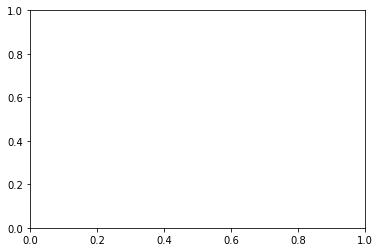

In [101]:
plt.boxplot(data_geo, labels=data_geo.columns, showfliers=False, widths=(1,1,1,1))

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

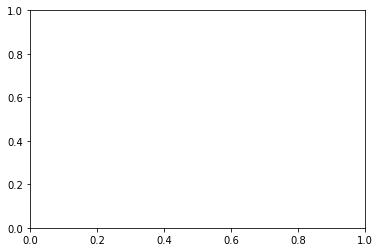

In [102]:
plt.boxplot(data_weather, labels=data_weather.columns, showfliers=False, widths=(1,1,1,1,1))

In [ ]:
corr_full = data_new.corr()
corr_full

In [ ]:
data_signs=data_new[data_new['Sign']==True]

In [ ]:
data_signs.shape

In [ ]:
percent_signs = data_signs['Severity'].value_counts()/data_signs.shape[0]*100
percent_signs

In [ ]:
type(percent_signs)

In [103]:
compare_per = pd.DataFrame({'full_data':percent_df,'after_drop_full_data':percent_data,'sign_present':percent_signs})

NameError: name 'percent_signs' is not defined

In [ ]:
compare_per

Note: How the class distribution changes slightly between when signage is there or not. Class 1 

# SAVE DATA RUN ONCE

In [39]:
data_new.to_csv('../../project_data/US_accidents_full_cleaned_1.csv')

In [40]:
data_signs.to_csv('../../project_data/US_accidents_signs_only_cleaned_1.csv')

In [43]:
############# END CODE #######

In [44]:
trigger error

SyntaxError: invalid syntax (3955523472.py, line 1)

In [ ]:
df.shape

In [ ]:
################

In [ ]:
df_signs=df[df['Sign']==True]

In [ ]:
df_signs.shape

In [ ]:
df_signs = df_signs.dropna()

In [ ]:
#####
df_signs['Severity'].value_counts()

In [ ]:
df_signs_1=df_signs[df_signs['Severity']==1]
df_signs_2=df_signs[df_signs['Severity']==2]
df_signs_3=df_signs[df_signs['Severity']==3]
df_signs_4=df_signs[df_signs['Severity']==4]

In [ ]:
df_signs_2.head()

In [ ]:
df_signs_1 = df_signs_1.sample(n=15900)
df_signs_1.shape

In [ ]:
df_signs_2 = df_signs_2.sample(n=15900)
df_signs_2.shape

In [ ]:
df_signs_2.head()

In [ ]:
df_signs_3 = df_signs_3.sample(n=15900)
df_signs_3.shape

In [ ]:
df_signs_4 = df_signs_4.sample(n=15900)
df_signs_4.shape

In [ ]:
frames = [df_signs_1, df_signs_2, df_signs_3,df_signs_4]
df_balanced = pd.concat(frames)
df_balanced.reset_index(inplace= True)
df_balanced = df_balanced.drop('index',axis=1)

In [ ]:
df_balanced.head()

In [ ]:
df_balanced['Severity'].value_counts()

In [ ]:
df_balanced.tail()

In [ ]:
df_balanced.describe()

In [ ]:
df_balanced.iloc[0]

In [ ]:
df_balanced.isna().sum()

In [ ]:
df_balanced.to_csv('../data/US_accidents_cleaned_TW7.csv')

In [ ]:
import missingno as msno
#df_signs[df_signs['Severity']==4].isna().sum()
msno.matrix(df_signs)

In [ ]:
df.tail()